# EDA 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Ass/BIKE DETAILS.csv')


In [2]:
#Ans1
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
print("Range of selling prices:", selling_price_range)


Range of selling prices: 755000


In [3]:
#Ans2
median_price = df['selling_price'].median()
print("Median selling price:", median_price)


Median selling price: 45000.0


In [4]:
#Ans3
most_common_seller = df['seller_type'].mode()[0]
print("Most common seller type:", most_common_seller)


Most common seller type: Individual


In [5]:
#Ans4
high_mileage_bikes = df[df['km_driven'] > 50000].shape[0]
print("Number of bikes with >50,000 km driven:", high_mileage_bikes)


Number of bikes with >50,000 km driven: 170


In [6]:
#Ans5
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km driven per ownership type:\n", avg_km_by_owner)


Average km driven per ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [7]:
#Ans6
prop_old_bikes = (df['year'] <= 2015).mean()
print("Proportion of bikes from 2015 or older:", round(prop_old_bikes, 2))


Proportion of bikes from 2015 or older: 0.57


In [8]:
#Ans7
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [9]:
#Ans8
max_price_idx = df['ex_showroom_price'].idxmax()
bike_with_max_price = df.loc[max_price_idx, ['name', 'ex_showroom_price']]
print("Bike with highest ex-showroom price:\n", bike_with_max_price)


Bike with highest ex-showroom price:
 name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [10]:
#Ans9
seller_counts = df['seller_type'].value_counts()
print("Number of bikes by seller type:\n", seller_counts)


Number of bikes by seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


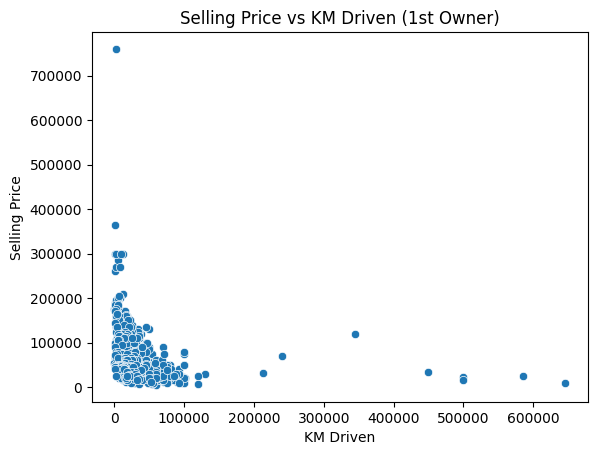

In [11]:
#Ans10
import seaborn as sns
sns.scatterplot(data=df[df['owner'].str.contains('1st', case=False)], x='km_driven', y='selling_price')
plt.title("Selling Price vs KM Driven (1st Owner)")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.show()


In [12]:
#Ans11
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]
print("Outliers removed. Original:", df.shape[0], "Filtered:", filtered_df.shape[0])


Outliers removed. Original: 1061 Filtered: 1022


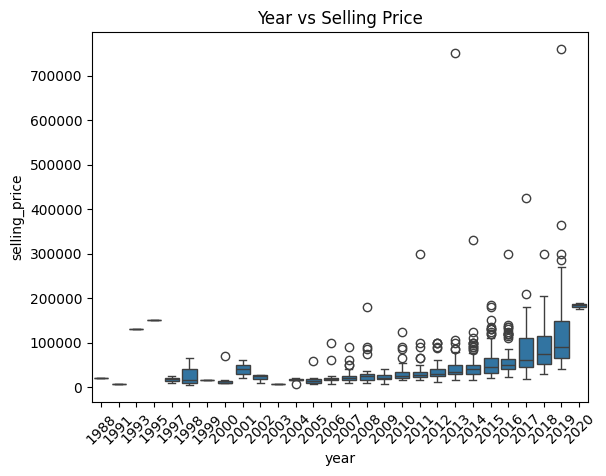

In [13]:
#Ans12
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title("Year vs Selling Price")
plt.show()


In [14]:
#Ans13
current_year = 2025
df['age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation_by_age = df.groupby('age')['depreciation'].mean()
print("Average depreciation by age:\n", avg_depreciation_by_age)


Average depreciation by age:
 age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [15]:
#Ans14\
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['above_avg_price'] = df.apply(lambda row: row['selling_price'] > avg_price_by_year.loc[row['year']] * 1.25, axis=1)
high_priced_bikes = df[df['above_avg_price']]
print("Bikes priced significantly above average:\n", high_priced_bikes[['name', 'year', 'selling_price']])


Bikes priced significantly above average:
                                       name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
17                        Yamaha YZF R15 S  2010          40000
...                                    ...   ...            ...
983              Royal Enfield Classic 350  2015         100000
984              Royal Enfield Classic 500  2014          95000
985              Royal Enfield Classic 500  2011          90000
1008                    Bajaj Pulsar 220 F  2012          52000
1023                Bajaj Avenger 220 dtsi  2012          45000

[224 rows x 3 columns]


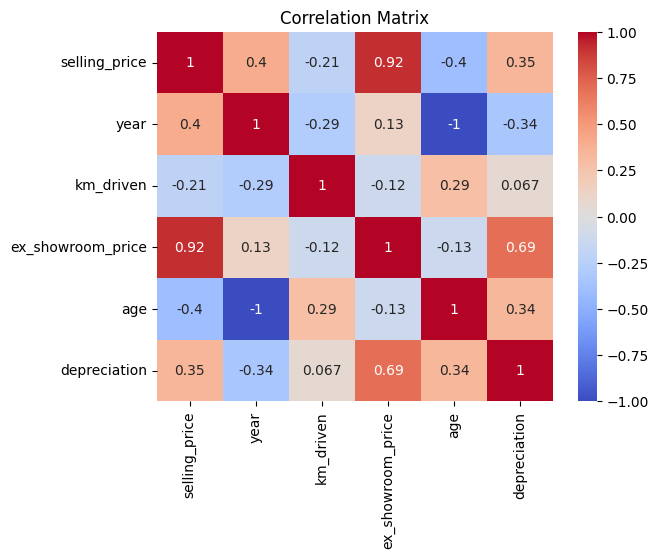

In [16]:
#Ans15
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# EDA 2

In [19]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Ass/Car Sale.csv')

In [ ]:
#Ans1
avg_price_by_dealer = df.groupby('Dealer Name')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_by_dealer)
sns.barplot(x=avg_price_by_dealer.values, y=avg_price_by_dealer.index)
plt.title("Average Selling Price by Dealer")
plt.xlabel("Average Price ($)")
plt.show()

In [21]:
#Ans2
price_std_by_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Brand with highest price variation:\n", price_std_by_company.head(1))


Brand with highest price variation:
 Company
Lincoln    19658.050211
Name: Price ($), dtype: float64


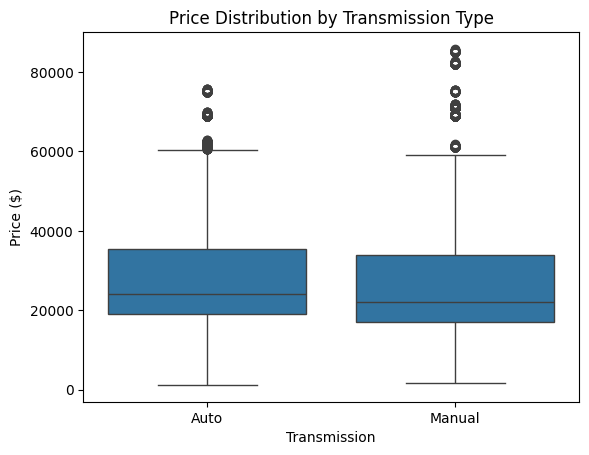

In [22]:
#Ans3
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title("Price Distribution by Transmission Type")
plt.show()


In [ ]:
#Ans4
sns.boxplot(x='Dealer Region', y='Price ($)', data=df)
plt.title("Price Distribution Across Regions")
plt.show()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


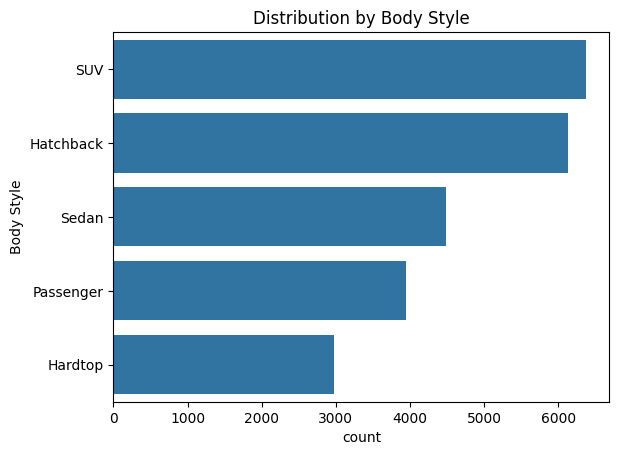

In [24]:
#Ans5
body_style_counts = df['Body Style'].value_counts()
print(body_style_counts)
sns.countplot(y='Body Style', data=df, order=body_style_counts.index)
plt.title("Distribution by Body Style")
plt.show()


In [ ]:
#Ans6
avg_price_by_gender_income = df.groupby('Gender')['Price ($)', 'Annual Income'].mean()
print(avg_price_by_gender_income)
sns.boxplot(x='Gender', y='Price ($)', data=df)
plt.title("Car Price Distribution by Gender")
plt.show()


In [ ]:
#Ans7
sales_by_region = df['Dealer Region'].value_counts()
avg_price_by_region = df.groupby('Dealer Region')['Price ($)'].mean()
print("Sales by Region:\n", sales_by_region)
print("Avg Price by Region:\n", avg_price_by_region)

# Visuals
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, ax=ax[0])
ax[0].set_title("Number of Cars Sold by Region")

sns.barplot(x=avg_price_by_region.index, y=avg_price_by_region.values, ax=ax[1])
ax[1].set_title("Average Car Price by Region")
plt.show()


In [26]:
#Ans8
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_by_engine)


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


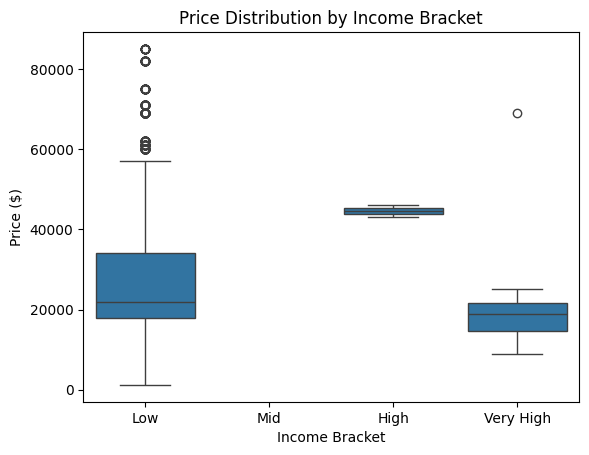

In [27]:
#Ans9
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 40000, 80000, 120000, 200000], labels=['Low', 'Mid', 'High', 'Very High'])
sns.boxplot(x='Income Bracket', y='Price ($)', data=df)
plt.title("Price Distribution by Income Bracket")
plt.show()


In [ ]:
#Ans10
top_models = df['Modet'].value_counts().nlargest(5).index
top_df = df[df['Modet'].isin(top_models)]

sns.boxplot(x='Modet', y='Price ($)', data=top_df)
plt.title("Price Distribution of Top 5 Models")
plt.show()


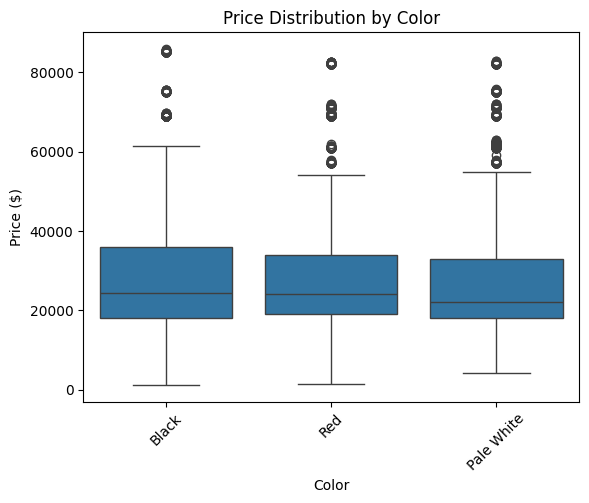

Highest price variation by color:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [29]:
#Ans11
sns.boxplot(x='Color', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Color")
plt.show()

# Variation by color
color_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Highest price variation by color:\n", color_variation.head())


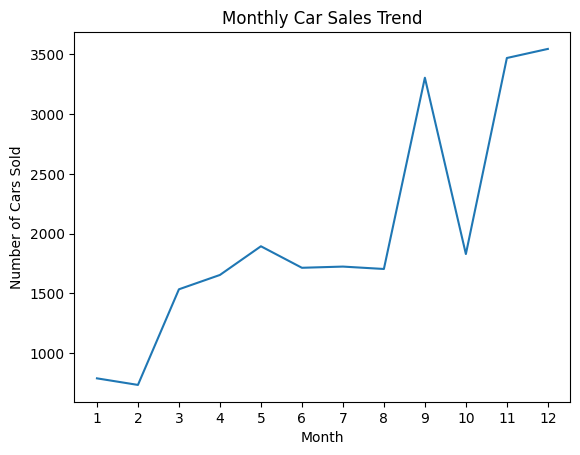

In [30]:
#Ans12
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

sales_by_month = df['Month'].value_counts().sort_index()
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values)
plt.title("Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.xticks(range(1, 13))
plt.show()


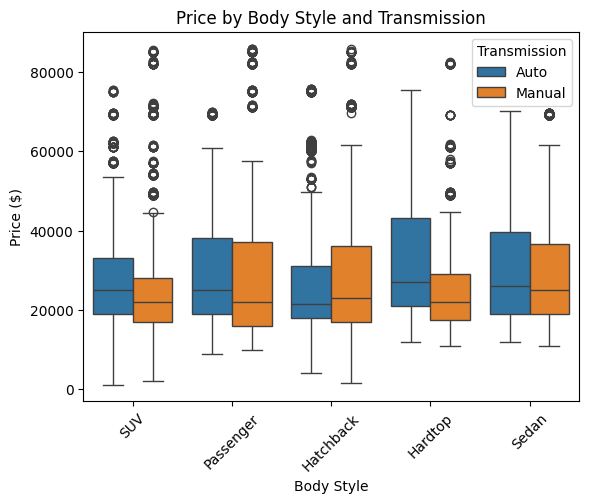

In [31]:
#Ans13
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title("Price by Body Style and Transmission")
plt.xticks(rotation=45)
plt.show()


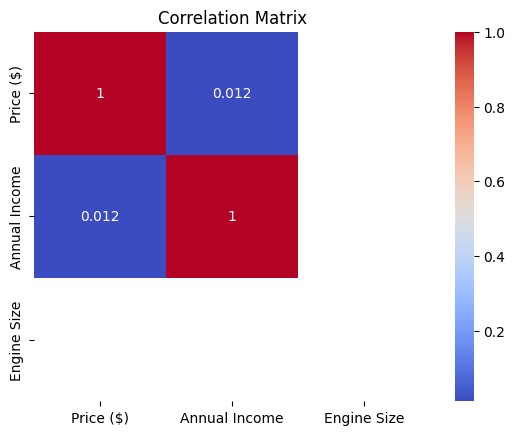

In [32]:
#Ans14
# Optional: Convert Engine to numeric if possible (e.g., "V6" -> 6)
df['Engine Size'] = df['Engine'].str.extract(r'(\d+)').astype(float)

# Correlation matrix
corr_cols = df[['Price ($)', 'Annual Income', 'Engine Size']]
sns.heatmap(corr_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#Ans15
avg_price_model_engine = df.groupby(['Modet', 'Engine'])['Price ($)'].mean().sort_values(ascending=False)
print("Average price by model and engine:\n", avg_price_model_engine.head(10))

# EDA 3

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Ass/amazon.csv")  # Replace with your file path

# Optional cleanup
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
#Ans1
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index)
plt.title("Average Rating by Category")
plt.xlabel("Average Rating")
plt.show()


In [37]:
#Ans2
top_rated_products = df.sort_values('rating_count', ascending=False).groupby('category').head(1)
print(top_rated_products[['category', 'product_name', 'rating_count']])


                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  P

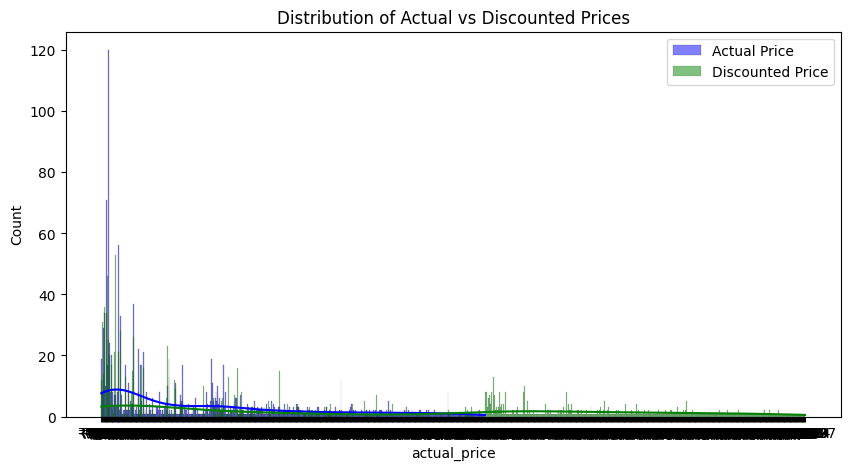

In [38]:
#Ans3
plt.figure(figsize=(10, 5))
sns.histplot(df['actual_price'], color='blue', label='Actual Price', kde=True)
sns.histplot(df['discounted_price'], color='green', label='Discounted Price', kde=True)
plt.legend()
plt.title("Distribution of Actual vs Discounted Prices")
plt.show()


In [ ]:
#Ans4
avg_discount_by_cat = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print(avg_discount_by_cat)
sns.barplot(x=avg_discount_by_cat.values, y=avg_discount_by_cat.index)
plt.title("Average Discount % by Category")
plt.xlabel("Discount %")
plt.show()

In [ ]:
#Ans5
top_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
print(top_products)

[('with', 3143), ('your', 1869), ('cable', 919), ('this', 894), ('from', 779), ('warranty', 733), ('charging', 662), ('type', 633), ('easy', 613), ('high', 603), ('power', 595), ('devices', 574), ('design', 543), ('that', 520), ('compatible', 488), ('water', 457), ('speed', 446), ('product', 446), ('charge', 433), ('fast', 424)]


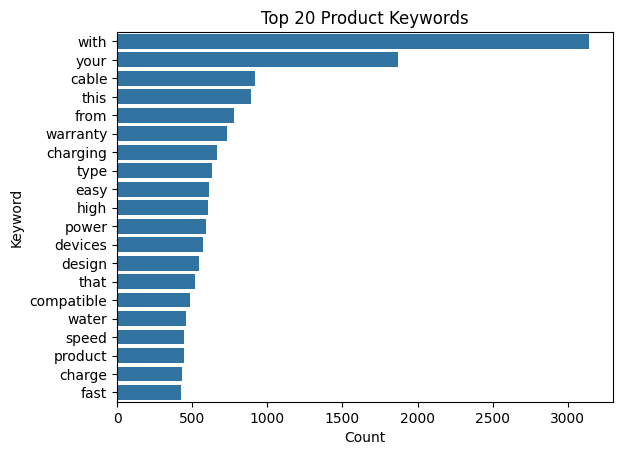

In [41]:
#Ans6
from collections import Counter
import re

keywords = df['about_product'].dropna().str.lower().str.cat(sep=' ')
keywords = re.findall(r'\b[a-z]{4,}\b', keywords)  # Filter out very short/stop words

top_keywords = Counter(keywords).most_common(20)
print(top_keywords)

# Optional bar plot
keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Count'])
sns.barplot(x='Count', y='Keyword', data=keywords_df)
plt.title("Top 20 Product Keywords")
plt.show()


In [42]:
#Ans7
df['review_length'] = df['review_content'].str.len()
popular_reviews = df.sort_values(['rating_count', 'review_length'], ascending=False).head(5)
print(popular_reviews[['product_name', 'review_title', 'review_content']])


                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
977   Sennheiser CX 80S in-Ear Wired Headphones with...   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
977   A Quality Sound-Signature but leaves craving f...   
1059  Kettle is good but bottle is not good quality,...   
32    Great Cable, Charging Speeds Could Be Better,G...   

                                         review_content  
1279  Does the job well,doesn't work on sand. though...  
750   Nive,very good batteries received,Like,Good pr...  
977   For those looking for a genuine review & a bri...  
1059  Bottle quality is not good.,Best for hot water...  


In [ ]:
#Ans8
correlation = df[['discounted_price', 'rating']].corr().iloc[0, 1]
print("Correlation between discounted price and rating:", correlation)

sns.scatterplot(data=df, x='discounted_price', y='rating')
plt.title("Discounted Price vs Rating")
plt.show()

In [ ]:
#Ans9
top_categories = avg_rating_by_category.head(5)
print("Top 5 Categories:\n", top_categories)


Ans 10: Suggestions for optimization / improvement
Based on the insights, here are data-driven suggestions:

Improve Discount Strategy: If categories with low ratings also offer low discounts, consider boosting promotions there.

Target High-Engagement Categories: Categories with high rating counts and good ratings should be prioritized in marketing.

Address Low-Rated Categories: Dive deeper into customer feedback for poorly rated categories to enhance product quality.

Review Quality Optimization: Encourage users to write more detailed reviews for products with fewer or shorter reviews.

Keyword Optimization for SEO: Use the top keywords from reviews and descriptions to enhance product listings and SEO strategy.

Would you like me to run these analyses for you? If yes, upload your dataset (CSV preferred), and I can generate charts, summaries, or even export a Jupyter notebook for your project.











#EDA 4

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/drive/MyDrive/Ass/spotify.csv")  # Replace with your file path


In [46]:
#Ans1
# Check nulls
print("Null values:\n", df.isnull().sum())

# Drop rows with nulls
df.dropna(inplace=True)

# Check duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Drop duplicates
df.drop_duplicates(inplace=True)



Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27


In [ ]:
#Ans2
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

In [ ]:
#Ans3
sns.scatterplot(x='duration_(ms)', y='popularity', data=df)
plt.title("Popularity vs Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

In [ ]:
#Ans4
top_artists = df['artist'].value_counts().head(10)
print(top_artists)

sns.countplot(y='artist', data=df[df['artist'].isin(top_artists.index)], order=top_artists.index)
plt.title("Top 10 Artists by Track Count")
plt.show()

In [ ]:
#Ans5
least_popular = df.sort_values('popularity').head(5)
print(least_popular[['artist', 'track_name', 'popularity']])


In [ ]:
#Ans6
top5_artists = df['artist'].value_counts().head(5).index
avg_popularity = df[df['artist'].isin(top5_artists)].groupby('artist')['popularity'].mean().sort_values(ascending=False)
print(avg_popularity)

In [ ]:
#Ans7
top_tracks = df[df['artist'].isin(top5_artists)]
most_popular_tracks = top_tracks.sort_values(['artist', 'popularity'], ascending=[True, False]).drop_duplicates('artist')
print(most_popular_tracks[['artist', 'track_name', 'popularity']])


In [ ]:
#Ans8
sns.pairplot(df[['popularity', 'duration_(ms)']])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

In [ ]:
#Ans9
selected_artists = df['artist'].value_counts().head(5).index
sns.boxplot(data=df[df['artist'].isin(selected_artists)], x='artist', y='duration_(ms)')
plt.title("Track Duration Across Artists")
plt.show()

In [ ]:
#Ans10
sns.violinplot(data=df[df['artist'].isin(selected_artists)], x='artist', y='popularity')
plt.title("Popularity Distribution Across Artists")
plt.show()